In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import scipy.stats as stats

In [2]:
#read files
envdf = pd.read_csv('World_countries_env_vars.csv')
hdidf = pd.read_csv('HDI.csv')
happinessdf = pd.read_csv('2017.csv')

In [3]:
#clean up data. Many countries have different names across datasets
hdidf_index = hdidf.set_index('Country')
clean_hdidf = hdidf_index.rename(index = {"Bolivia (Plurinational State of)": "Bolivia",
                                        "Brunei Darussalam": "Brunei",
                                        "Guinea-Bissau":"Guinea Bissau",
                                        "Hong Kong, China (SAR)":"Hong Kong",
                                        "Iran (Islamic Republic of)":"Iran",
                                        "Lao People's Democratic Republic":"Laos",
                                        "Moldova (Republic of)":"Moldova",
                                        "Russian Federation":"Russia",
                                        "Syrian Arab Republic":"Syria",
                                        "Venezuela (Bolivarian Republic of)":"Venezuela",
                                        "Viet Nam":"Vietnam"
                                         }) 
envdf_index = envdf.set_index('Country')
clean_envdf = envdf_index.rename(index = {"United States of America": "United States",
                                        "Hong Kong S.A.R.": "Hong Kong",})
                                          
happinessdf_index = happinessdf.set_index('Country')
clean_happinessdf = happinessdf_index.rename(index = {"Hong Kong S.A.R., China": "Hong Kong", }) 

In [4]:
#merge all 3 datasets using inner join
combineddf = clean_envdf.merge(clean_hdidf,  how = 'inner' , on='Country')
combineddf1 = combineddf.merge(clean_happinessdf, how = 'inner' , on='Country')

In [5]:
#create bins based on per capita. Bins are created using exponents instead of linear
percapitabins = [0]
powers_5 = [1000*5**n for n in range(0,5)]
percapitabins .extend(powers_5)
percapitalabels = [f'0 upto 1000']
for n in range(1,5):
   percapitalabels.append(f'{1000*5**(n-1)} till {1000*5**(n)}')
print(percapitabins ,percapitalabels)
combineddf1["binnedpercapita"] = pd.cut(combineddf1['Gross national income (GNI) per capita'], bins=percapitabins , labels=percapitalabels)
combineddf1.to_excel('converted.xls')

[0, 1000, 5000, 25000, 125000, 625000] ['0 upto 1000', '1000 till 5000', '5000 till 25000', '25000 till 125000', '125000 till 625000']


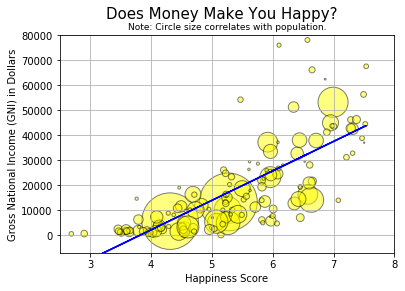

rvalue: 0.687582    pvalue: 0.000000
The actual p value is: 1.763923507654215e-21


In [6]:
# Are people happier in countries with a higher GDP per capita?

happy = combineddf1["Happiness.Score"]
gni = combineddf1["Gross national income (GNI) per capita"]
population = combineddf1["Total Population (millions) 2015"]

plt.scatter(happy, gni, marker="o", facecolors="yellow", edgecolors="black", s=(population**0.9)*5, alpha=0.5)

plt.grid()
plt.suptitle("Does Money Make You Happy?", fontsize = 15, verticalalignment = "top")
plt.title("\nNote: Circle size correlates with population.", fontsize = 9, verticalalignment = "baseline")
plt.xlabel("Happiness Score")
plt.ylabel("Gross National Income (GNI) in Dollars")
plt.ylim(-7000, 80000)
plt.xlim(2.5,8)

plt.savefig("Happiness Compared to GNI.png")

z = np.polyfit(happy, gni, 1)
p = np.poly1d(z)
plt.plot(happy,p(happy),"b-")

plt.show()

slope1, intercept1, rvalue1, pvalue1, stderr1 = stats.linregress(happy, gni)
print("rvalue: %f    pvalue: %f" % (rvalue1, pvalue1))
print(F"The actual p value is: {pvalue1}")

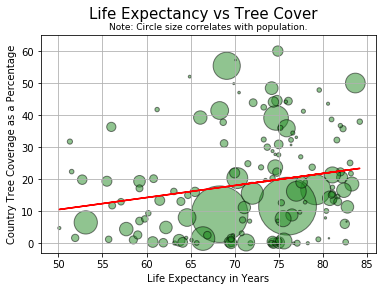

rvalue: 0.200112    pvalue: 0.016182
The actual p value is: 0.016181666624671496


In [7]:
# Do people in countries with more tree cover live longer?

trees = combineddf1["tree_canopy_cover"]
longevity = combineddf1["Life expectancy"]
population = combineddf1["Total Population (millions) 2015"]

plt.scatter(longevity, trees, marker="o", facecolors="forestgreen", edgecolors="black", s=(population**0.9)*5, alpha=0.5)

plt.grid()
plt.suptitle("Life Expectancy vs Tree Cover", fontsize = 15, verticalalignment = "top")
plt.title("\nNote: Circle size correlates with population.", fontsize = 9, verticalalignment = "baseline")
plt.xlabel("Life Expectancy in Years")
plt.ylabel("Country Tree Coverage as a Percentage")
plt.ylim(-3, 65)
plt.xlim(48,86)

plt.savefig("Life Expectancy Compared to Tree Cover.png")

z = np.polyfit(longevity, trees, 1)
p = np.poly1d(z)
plt.plot(longevity,p(longevity),"r-")

plt.show()

slope2, intercept2, rvalue2, pvalue2, stderr2 = stats.linregress(longevity, trees)
print("rvalue: %f    pvalue: %f" % (rvalue2, pvalue2))
print(F"The actual p value is: {pvalue2}")

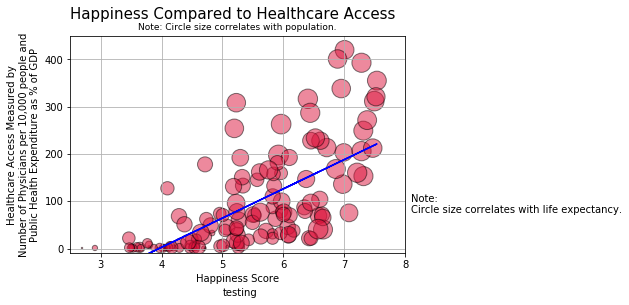

rvalue: 0.686562    pvalue: 0.000000
The actual p value is: 1.068290711630139e-20


In [8]:
# Are healthier people happier?

phys = combineddf1["Physicians  (per 10,000 people) 2001-2014"]
phe = combineddf1["Public health expenditure (% of GDP) 2014"]
phys_phe = (phys*phe)
combineddf1["pphe"] = phys_phe
healthdf = combineddf1[["Happiness.Score","Life expectancy", "pphe", "Total Population (millions) 2015", "elevation"]]
healthdf2 = healthdf.dropna(axis=0, how="any")
health = healthdf2["pphe"]
happy2 = healthdf2["Happiness.Score"]
longevity2 = healthdf2["Life expectancy"]
population2 = healthdf2["Total Population (millions) 2015"]


plt.scatter(happy2, health, marker="o", facecolors="crimson", edgecolors="black", s=(longevity2-50)**1.7, alpha=0.5)

plt.grid()
plt.suptitle("Happiness Compared to Healthcare Access", fontsize = 15, verticalalignment = "top")
plt.title("\nNote: Circle size correlates with population.", fontsize = 9, verticalalignment = "baseline")
plt.xlabel("Happiness Score")
plt.ylabel("Healthcare Access Measured by\nNumber of Physicians per 10,000 people and\nPublic Health Expenditure as % of GDP")
plt.ylim(-10, 450)
plt.xlim(2.5,8)
plt.text(8.1,75,"Note:\nCircle size correlates with life expectancy.")

plt.savefig("Happiness Compared to Access to Healthcare.png")

z = np.polyfit(happy2, health, 1)
p = np.poly1d(z)
plt.plot(happy2,p(happy2),"b-")

plt.text(5, -100, "testing")

plt.show()

slope3, intercept3, rvalue3, pvalue3, stderr3 = stats.linregress(happy2, health)
print("rvalue: %f    pvalue: %f" % (rvalue3, pvalue3))
print(F"The actual p value is: {pvalue3}")

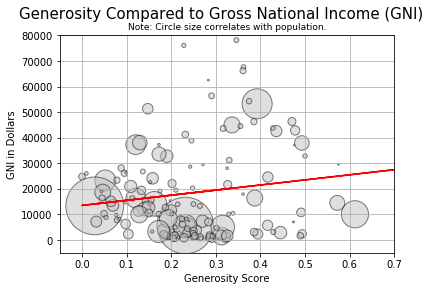

rvalue: 0.140716    pvalue: 0.092518
The actual p value is: 0.0925180054660505


In [9]:
# Are people in countries with an above average GPD more generous

gni = combineddf1["Gross national income (GNI) per capita"]
generosity = combineddf1["Generosity"]
population = combineddf1["Total Population (millions) 2015"]

plt.scatter(generosity, gni, marker="o", facecolors="silver", edgecolors="black", s=(population**0.9)*5, alpha=0.5)

plt.grid()
plt.suptitle("Generosity Compared to Gross National Income (GNI)", fontsize = 15, verticalalignment = "top")
plt.title("\nNote: Circle size correlates with population.", fontsize = 9, verticalalignment = "baseline")
plt.xlabel("Generosity Score")
plt.ylabel("GNI in Dollars")
plt.ylim(-5000, 80000)
plt.xlim(-0.05,0.7)
plt.savefig("Generosity Compared to GNI.png")

z = np.polyfit(generosity, gni, 1)
p = np.poly1d(z)
plt.plot(generosity,p(generosity),"r-")

plt.show()

slope4, intercept4, rvalue4, pvalue4, stderr4 = stats.linregress(generosity, gni)
print("rvalue: %f    pvalue: %f" % (rvalue4, pvalue4))
print(F"The actual p value is: {pvalue4}")

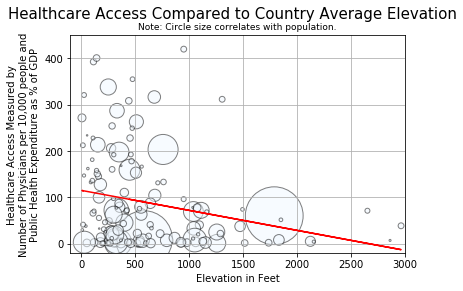

rvalue: -0.242328    pvalue: 0.004051
The actual p value is: 0.004050797955355632


In [10]:
# Are people in highly elevated countries healthier on average?

healthdf2 = healthdf.dropna(axis=0, how="any")
health = healthdf2["pphe"]
population2 = healthdf2["Total Population (millions) 2015"]
elevation = healthdf2["elevation"]

plt.scatter(elevation, health, marker="o", facecolors="aliceblue", edgecolors="black", s=(population2**0.9)*5, alpha=0.5)

plt.grid()
plt.suptitle("Healthcare Access Compared to Country Average Elevation", fontsize = 15, verticalalignment = "top")
plt.title("\nNote: Circle size correlates with population.", fontsize = 9, verticalalignment = "baseline")
plt.xlabel("Elevation in Feet")
plt.ylabel("Healthcare Access Measured by\nNumber of Physicians per 10,000 people and\nPublic Health Expenditure as % of GDP")
plt.ylim(-20, 450)
plt.xlim(-100,3000)

plt.savefig("Elevation Compared to Healthcare Access.png")

z = np.polyfit(elevation, health, 1)
p = np.poly1d(z)
plt.plot(elevation,p(elevation),"r-")

plt.show()

slope5, intercept5, rvalue5, pvalue5, stderr5 = stats.linregress(elevation, health)
print("rvalue: %f    pvalue: %f" % (rvalue5, pvalue5))
print(F"The actual p value is: {pvalue5}")

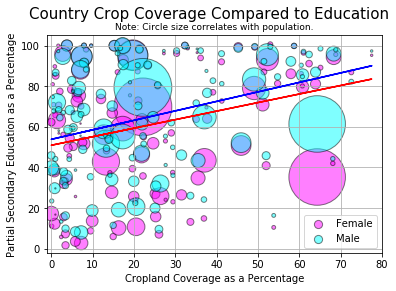

The results for female education are:
rvalue: 0.284103    pvalue: 0.000767
The actual p value is: 0.0007668867690192476

The results for male education are:
rvalue: 0.348024    pvalue: 0.000031
The actual p value is: 3.0832271086153646e-05


In [11]:
# Is there is relationship between crop cover and education?

cropdf = combineddf1[["cropland_cover","Population with at least some secondary education % (2005-2015) Female",
                      "Population with at least some secondary education % (2005-2015) Male","Total Population (millions) 2015"]]
cropdf = cropdf.dropna(axis=0, how="any")
crop2 = cropdf["cropland_cover"]
female_education = cropdf["Population with at least some secondary education % (2005-2015) Female"]
male_education = cropdf["Population with at least some secondary education % (2005-2015) Male"]
population3 = cropdf["Total Population (millions) 2015"]

plt.scatter(crop2, female_education, marker="o", facecolors="fuchsia", edgecolors="black", s=(population**0.9)*5, alpha=0.5, label="Female")
plt.scatter(crop2, male_education, marker="o", facecolors="cyan", edgecolors="black", s=(population**0.9)*5, alpha=0.5, label = "Male")

plt.grid()
plt.suptitle("Country Crop Coverage Compared to Education", fontsize = 15, verticalalignment = "top")
plt.title("\nNote: Circle size correlates with population.", fontsize = 9, verticalalignment = "baseline")
plt.xlabel("Cropland Coverage as a Percentage")
plt.ylabel("Partial Secondary Education as a Percentage")
plt.ylim(-2, 105)
plt.xlim(-1,80)

plt.savefig("Country Crop Coverage Compared to Education.png")

plt.legend(markerscale = 0.2)

z = np.polyfit(crop2, female_education, 1)
p = np.poly1d(z)
plt.plot(crop2,p(crop2),"r-")

z = np.polyfit(crop2, male_education, 1)
p = np.poly1d(z)
plt.plot(crop2,p(crop2),"b-")

plt.show()

slope6, intercept6, rvalue6, pvalue6, stderr6 = stats.linregress(female_education, crop2)
slope7, intercept7, rvalue7, pvalue7, stderr7 = stats.linregress(male_education, crop2)
print("The results for female education are:")
print("rvalue: %f    pvalue: %f" % (rvalue6, pvalue6))
print(F"The actual p value is: {pvalue6}")
print("\nThe results for male education are:")
print("rvalue: %f    pvalue: %f" % (rvalue7, pvalue7))
print(F"The actual p value is: {pvalue7}")

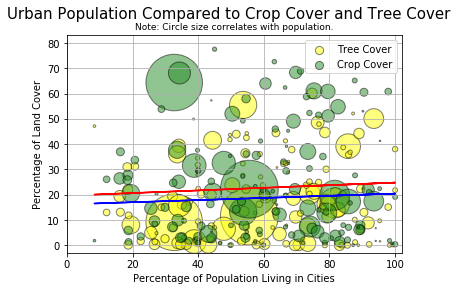

The results for tree coverage are:
rvalue: 0.061310    pvalue: 0.465393
The actual p value is: 0.4653933061455158

The results for crop coverage are:
rvalue: 0.058075    pvalue: 0.489311
The actual p value is: 0.48931105622282656


In [12]:
# Do countries with high urban populations have more or less crop coverage? Or tree coverage?

crop = combineddf1["cropland_cover"]
trees = combineddf1["tree_canopy_cover"]
urban = combineddf1["Population Urban 2015 %"]
population = combineddf1["Total Population (millions) 2015"]

plt.scatter(urban, trees, marker="o", facecolors="yellow", edgecolors="black", s=(population**0.9)*5, alpha=0.5, label = "Tree Cover")
plt.scatter(urban, crop, marker="o", facecolors="forestgreen", edgecolors="black", s=(population**0.9)*5, alpha=0.5, label = "Crop Cover")

plt.grid()
plt.suptitle("Urban Population Compared to Crop Cover and Tree Cover", fontsize = 15, verticalalignment = "top")
plt.title("\nNote: Circle size correlates with population.", fontsize = 9, verticalalignment = "baseline")
plt.xlabel("Percentage of Population Living in Cities")
plt.ylabel("Percentage of Land Cover")
plt.ylim(-3,83)
plt.xlim(0,102)
plt.savefig("Urban Population Compared to Crop Cover and Tree Cover.png")

plt.legend(markerscale = 0.2, loc = "upper right")

z = np.polyfit(urban, crop, 1)
p = np.poly1d(z)
plt.plot(urban,p(urban),"r-")

z2 = np.polyfit(urban, trees, 1)
p2 = np.poly1d(z2)
plt.plot(urban,p2(urban),"b-")

plt.show()

slope8, intercept8, rvalue8, pvalue8, stderr8 = stats.linregress(urban, trees)
slope9, intercept9, rvalue9, pvalue9, stderr9 = stats.linregress(urban, crop)
print("The results for tree coverage are:")
print("rvalue: %f    pvalue: %f" % (rvalue8, pvalue8))
print(F"The actual p value is: {pvalue8}")
print("\nThe results for crop coverage are:")
print("rvalue: %f    pvalue: %f" % (rvalue9, pvalue9))
print(F"The actual p value is: {pvalue9}")

In [13]:
#Find the list of columns that have atleast one row with nan
combineddf1.columns[combineddf1.isnull().any()]

Index(['elevation', 'aspect', 'slope', 'wind', 'cloudiness', 'HDI Rank', 'HDI',
       'Mean years of schooling', 'GNI per capita rank minus HDI rank',
       'Change in HDI rank 2010-2015', 'Average annual HDI growth 1990-2000',
       'Average annual HDI growth 2000-2010',
       'Average annual HDI growth 2010-2015',
       'Average annual HDI growth 1990-2015', 'Gender Development Index value',
       'Gender Development Index Group',
       'Human Development Index (HDI) Female',
       'Human Development Index (HDI) Male', 'Mean years of schooling Female',
       'Mean years of schooling Male',
       'Estimated gross national income per capita Female',
       'Estimated gross national income per capita Male',
       'Share of seats in parliament (% held by women)',
       'Population with at least some secondary education % (2005-2015) Female',
       'Population with at least some secondary education % (2005-2015) Male',
       'Population Ages 15–64 (millions) 2015',
       'I

In [14]:
# Find the list of columns that have only one value that is nan
nullcolumns = combineddf1.isnull().sum(axis=0)
nullcolumns
nullcolumns[nullcolumns==1]

elevation                                                    1
aspect                                                       1
slope                                                        1
HDI Rank                                                     1
HDI                                                          1
Mean years of schooling                                      1
GNI per capita rank minus HDI rank                           1
Change in HDI rank 2010-2015                                 1
Average annual HDI growth 2010-2015                          1
Estimated gross national income per capita Female            1
Estimated gross national income per capita Male              1
Share of seats in parliament (% held by women)               1
Population Ages 15–64 (millions) 2015                        1
Infants lacking immunization DTP (% of one-year-olds)        1
Infants lacking immunization Measles (% of one-year-olds)    1
Mortality rates Infant (per 1,000 live births) 2015    

In [15]:
#For one of the above columns replace nan with the bin average
combineddf1['Share of seats in parliament (% held by women)'] = combineddf1[['Share of seats in parliament (% held by women)']].fillna(combineddf1.groupby('binnedpercapita').transform('mean'))
#combineddf1[['Share of seats in parliament (% held by women)']].fillna(2)
nullcolumns1 = combineddf1.isnull().sum(axis=0)
nullcolumns1
nullcolumns1[nullcolumns1==1]
#[x for x in combineddf1['Share of seats in parliament (% held by women)']]

elevation                                                    1
aspect                                                       1
slope                                                        1
HDI Rank                                                     1
HDI                                                          1
Mean years of schooling                                      1
GNI per capita rank minus HDI rank                           1
Change in HDI rank 2010-2015                                 1
Average annual HDI growth 2010-2015                          1
Estimated gross national income per capita Female            1
Estimated gross national income per capita Male              1
Population Ages 15–64 (millions) 2015                        1
Infants lacking immunization DTP (% of one-year-olds)        1
Infants lacking immunization Measles (% of one-year-olds)    1
Mortality rates Infant (per 1,000 live births) 2015          1
Mortality rates Under-five (per 1,000 live births) 2015

In [16]:
#Check correlation  of Happiness with one column, say Internet users
combineddf1['Internet users'].corr(combineddf1['Happiness.Score'])

0.8066985073861793

In [17]:
# Creating a dataframe with only columns that are all non-nulls
combineddf2 = combineddf1.dropna( axis=1, how='any', thresh=None, subset=None)
combineddf2.to_excel('nonulls.xls')
#Creating a series that checks correltion between Happiness score and all other columns
correlations = combineddf2[combineddf2.columns[:]].corr()['Happiness.Score'][:]


In [18]:
type(correlations)

pandas.core.series.Series

In [19]:
#Sorting my columms that have most correlations with Happiness score
correlations.sort_values(ascending=False)
#correlations.to_excel('corr.xls')

Happiness.Score                                                         1.000000
Whisker.low                                                             0.999501
Whisker.high                                                            0.999477
Economy..GDP.per.Capita.                                                0.810689
Internet users                                                          0.806699
Inequality-adjusted life expectancy index                               0.787390
Health..Life.Expectancy.                                                0.783550
Life expectancy                                                         0.781633
Life expectancy at birth Male                                           0.780866
Life expectancy at age 59 (years) 2010/2015                             0.770341
Life expectancy at birth Female                                         0.767016
Family                                                                  0.756369
Population Urban 2015 %     

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [21]:
#Creating a dataframe with a few columns that have good correlation with Happiness Index. Including population as well
X = combineddf2[['Total Population (millions) 2015', 'Whisker.low',
'Economy..GDP.per.Capita.',
'Internet users',
'Inequality-adjusted life expectancy index',
'Health..Life.Expectancy.',
'Family',
'Freedom',
'Dependency Ratio Old age (65 and older) /(per 100 people ages 15–64)',
'Dystopia.Residual',
'Trust..Government.Corruption.',
'cropland_cover',
'Generosity',
'temp_max_warmestMonth',
'rain_seasonailty',
'temp_diurnal_range',
'Deaths due to Tuberculosis (per 100,000 people) ',
'Total fertility rate (birth per woman) 2000/2007',
'Dependency Ration Young age (0–14) /(per 100 people ages 15–64)',
'Inequality in life expectancy (%) 2010-2015'
]]

#X.fillna(random.random(), inplace=True)


In [22]:
#Creating a Dataframe with happiness score alone
y = combineddf2['Happiness.Score']
#y.append([276,.9])
len(y)

X.to_excel('X.xls')

In [23]:
#Creating a Linear Regression Model
model = LinearRegression()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


NameError: name 'train_test_split' is not defined

In [25]:
#Providing the values to the model
model.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [26]:
# Creating a dataframe with countries and variables for which Happiness Index is to be predicted
testset = pd.read_csv('Pred_Input.csv')
#X_test
testset

,Total Population (millions) 2015,Whisker.low,Economy..GDP.per.Capita.,Internet users,Inequality-adjusted life expectancy index,Health..Life.Expectancy.,Family,Freedom,Dependency Ratio Old age (65 and older) /(per 100 people ages 15–64),Dystopia.Residual,Trust..Government.Corruption.,cropland_cover,Generosity,temp_max_warmestMonth,rain_seasonailty,temp_diurnal_range,"Deaths due to Tuberculosis (per 100,000 people)",Total fertility rate (birth per woman) 2000/2007,Dependency Ration Young age (0–14) /(per 100 people ages 15–64),Inequality in life expectancy (%) 2010-2015
0,100,6.911343,1.546259,74.6,0.856,0.774287,1.419921,0.443323,22.3,2.218113,0.135639,19.743870,0.392579,26.776731,43.415171,8.508100,0.1,1.9,28.6,6.1
1,1000,7.247597,1.479204,88.5,0.912,0.834558,1.481349,0.472788,23.8,2.187264,0.287372,3.796340,0.435540,16.428661,46.837965,12.194984,0.2,1.6,23.5,4.7
2,200,5.171112,0.995539,22.0,0.630,0.492346,1.274445,0.443323,7.7,2.218113,0.015317,13.240866,0.611705,30.133801,29.436566,8.508100,41.0,2.5,41.2,16.5
3,25,5.226721,1.081166,50.3,0.784,0.741416,1.160837,0.472788,13.0,2.187264,0.022794,22.183475,0.028807,25.190887,89.453030,12.194984,2.8,1.6,23.5,8.9


In [27]:
# Creating a happiess prediciton column and adding to the dataframe
predictions = model.predict(X_test)
testset['happiness_pred'] = model.predict(testset)

NameError: name 'X_test' is not defined

In [28]:
testset

,Total Population (millions) 2015,Whisker.low,Economy..GDP.per.Capita.,Internet users,Inequality-adjusted life expectancy index,Health..Life.Expectancy.,Family,Freedom,Dependency Ratio Old age (65 and older) /(per 100 people ages 15–64),Dystopia.Residual,Trust..Government.Corruption.,cropland_cover,Generosity,temp_max_warmestMonth,rain_seasonailty,temp_diurnal_range,"Deaths due to Tuberculosis (per 100,000 people)",Total fertility rate (birth per woman) 2000/2007,Dependency Ration Young age (0–14) /(per 100 people ages 15–64),Inequality in life expectancy (%) 2010-2015
0,100,6.911343,1.546259,74.6,0.856,0.774287,1.419921,0.443323,22.3,2.218113,0.135639,19.743870,0.392579,26.776731,43.415171,8.508100,0.1,1.9,28.6,6.1
1,1000,7.247597,1.479204,88.5,0.912,0.834558,1.481349,0.472788,23.8,2.187264,0.287372,3.796340,0.435540,16.428661,46.837965,12.194984,0.2,1.6,23.5,4.7
2,200,5.171112,0.995539,22.0,0.630,0.492346,1.274445,0.443323,7.7,2.218113,0.015317,13.240866,0.611705,30.133801,29.436566,8.508100,41.0,2.5,41.2,16.5
3,25,5.226721,1.081166,50.3,0.784,0.741416,1.160837,0.472788,13.0,2.187264,0.022794,22.183475,0.028807,25.190887,89.453030,12.194984,2.8,1.6,23.5,8.9


In [29]:
from sklearn.metrics import confusion_matrix, classification_report
#classification_report(y_test['Happiness.Score'], predictions)
#y_test['Happiness.Score']